In [18]:
from PIL import Image
import numpy as np
import ot
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


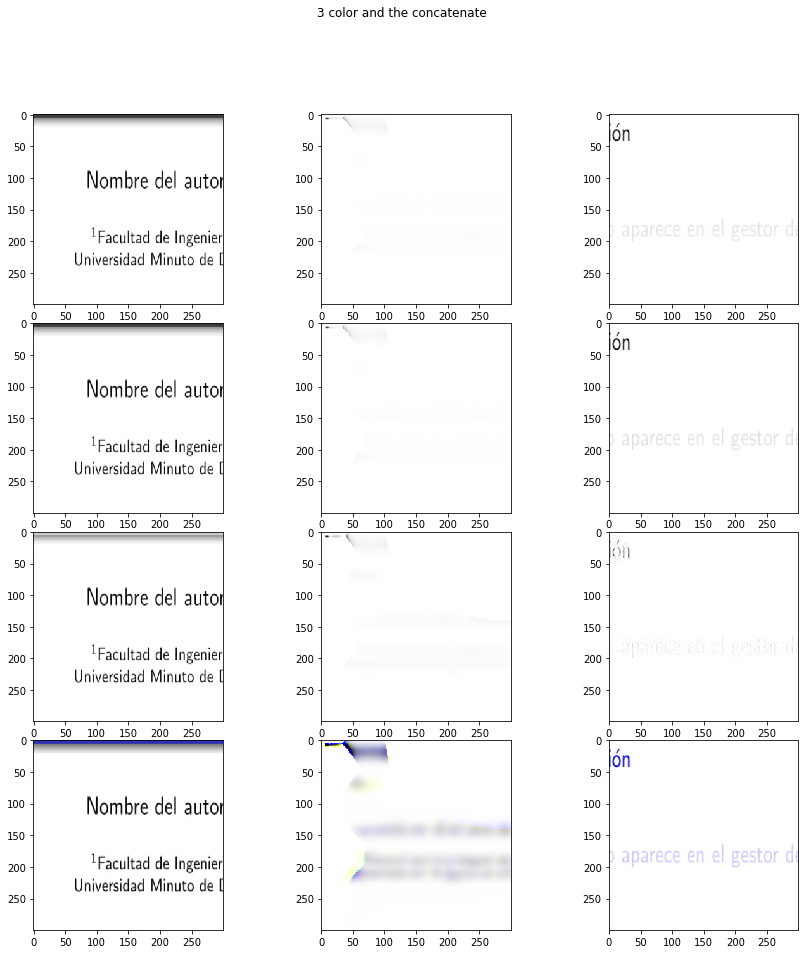

In [164]:
name_file = "./pdftoimage/Presentation_OT/Presentation_OT-"
type_file = ".png"
I_PIL = []
I = []
names = ["01", "02"]
number_color = 3



I_color = [[0] * number_color for _ in range(len(names))]
I_color[0][0] = 1
I_color_sum = np.zeros((len(names), 3))
for i,name in enumerate(names):
    I_PIL.append(Image.open(name_file + name + type_file))
    I.append(1 - (np.array(I_PIL[i])[300:600, 300:600, :] / 255))
    for color in range(3): # peut etre fait sans boucle
        I_color[i][color] = I[i][:, :, color].copy()
        I_color_sum[i, color] = I[i][:, :, color].sum()
        I_color[i][color] /= I_color_sum[i, color]

dimension_matrix = I[i].shape[0] * I[0].shape[1]
t = 0.5
weights = [t, 1-t]
reg = 0.001
bary_pred = []
fig, axs = plt.subplots(number_color + 1,3)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
fig.suptitle('3 color and the concatenate')
fig.set_figheight(15)
fig.set_figwidth(15)
bary_reconstructed = np.zeros_like(I[0])
gamma = []

for color in range(3):
    
    bary_pred.append(ot.bregman.convolutional_barycenter2d(np.array([I_color[0][color],
                                                                     I_color[1][color]]),
                                                           reg=reg,
                                                           weights=weights))
#     else: Ne passe pas du tout a l'echelle
#         C = toeplitz(np.arange(),np.arange())
#         C /= np.max(C)
#         gamma.append(ot.sinkhorn(C,
#                                  a=I_color[0][color].reshape(-1),
#                                  b=I_color[1][color].reshape(-1),
#                                  reg=0.01))
    
    bary_reconstructed[:, :, color] = color_readded(I_color_sum[0, color],
                                                    I_color_sum[1, color],
                                                    bary_pred[color],
                                                    t)
    axs[color][0].imshow(I_color[0][color], cmap="Greys")
    axs[color][1].imshow(bary_reconstructed[:, :, color], cmap="Greys")
    axs[color][2].imshow(I_color[1][color], cmap="Greys")
# plt.imshow(1 - I[0])
# plt.show()
color = color + 1
axs[color][0].imshow(1 - I[0])
axs[color][1].imshow(1 - bary_reconstructed)
axs[color][2].imshow(1 - I[1])
plt.show()


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [179]:
a = np.zeros((1,10))
a[0,1] = 1
first_row = np.arange(10)
first_col = np.arange(10)

print(toeplitz(first_col, first_row))

[[0 1 2 3 4 5 6 7 8 9]
 [1 0 1 2 3 4 5 6 7 8]
 [2 1 0 1 2 3 4 5 6 7]
 [3 2 1 0 1 2 3 4 5 6]
 [4 3 2 1 0 1 2 3 4 5]
 [5 4 3 2 1 0 1 2 3 4]
 [6 5 4 3 2 1 0 1 2 3]
 [7 6 5 4 3 2 1 0 1 2]
 [8 7 6 5 4 3 2 1 0 1]
 [9 8 7 6 5 4 3 2 1 0]]


In [45]:
def color_readded(I1_sum, I2_sum, I, t):
    return (t * I1_sum + (1 - t) * I2_sum) * I

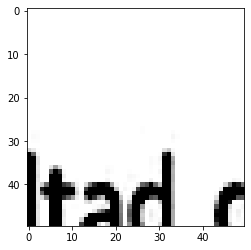

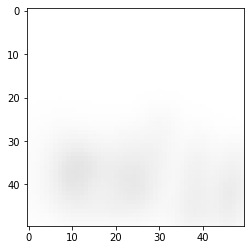

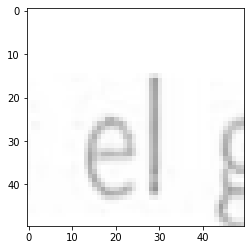

In [73]:
plt.imshow(I1 * I1_sum, cmap='Greys', vmin=0, vmax=1)
plt.show()
plt.imshow(color_readded(I1_sum=I2_sum, I2_sum=I2_sum, I=b, t=t), cmap='Greys', vmin=0, vmax=1)
plt.show()
plt.imshow(I2 * I2_sum, cmap='Greys', vmin=0, vmax=1)
plt.show()